In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Stats

In [102]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
train.shape

(891, 12)

Survived
0    549
1    342
Name: count, dtype: int64


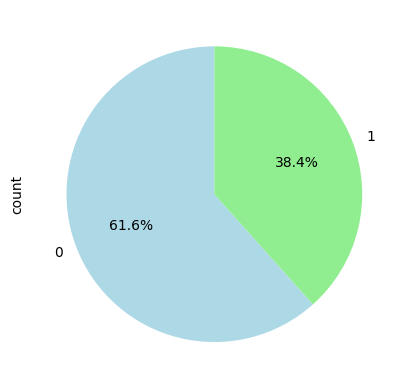

In [104]:
#create a pie chart to show the survival rate
survived = train['Survived'].value_counts()
survived.plot.pie(autopct = '%1.1f%%', startangle = 90, colors = ['lightblue', 'lightgreen'])
print(survived)


out of 891 passengers in the dataset, only 342 passengers are survived. That is a 38.4% of the total set.

Let's dive deep into this dataset and see, who had the possibilities to survive from this crash.

# Analyzing Features

**Sex column**

In [105]:
#group the passengers by gender and survival
train.groupby(['Sex','Survived'])['Sex'].count()


#train.groupby(['Sex', 'Survived'])['Survived'].count()     

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

According to the stats, there were 577 males and 314 females.
Out of 314 females, 233 able to survived while 81 were dying.
Out of 577 males, 109 males able to secure their lives while 468 dying.

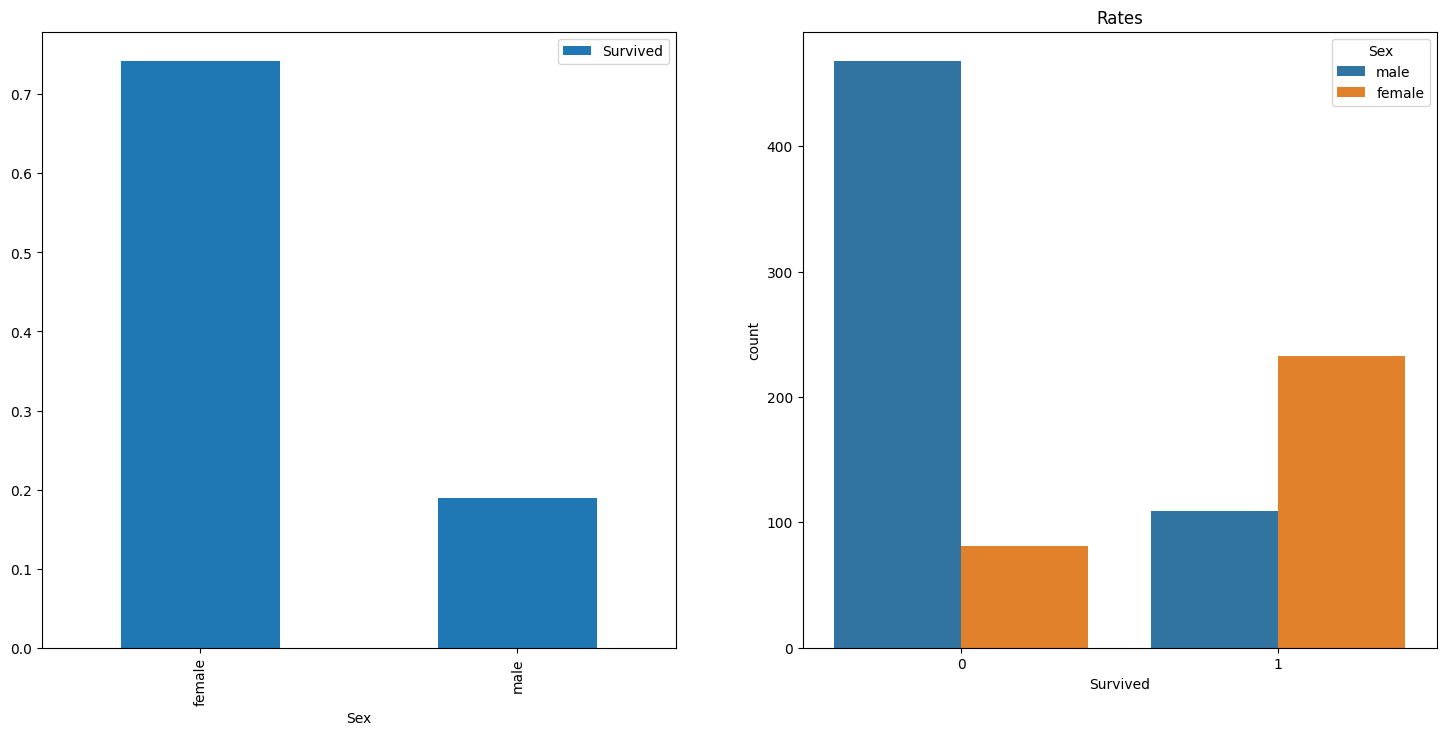

In [106]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])  #ax=ax[0]
#ax[0].set_title('Survived vs Sex')
#sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])

sns.countplot(x = 'Survived', hue ='Sex', data = train, ax=ax[1])
plt.title('Rates')
#ax[1].set_title('Sex:Survived vs Dead')
plt.show()

Even though the number of males on the ship is higher than the number of females on the ship, number of saved lives of females are still higher than the saved number of males.

Let's check the survived rate of passengers according to their social classes.

**Social Class**

In [107]:
#social classes and survival analysis
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


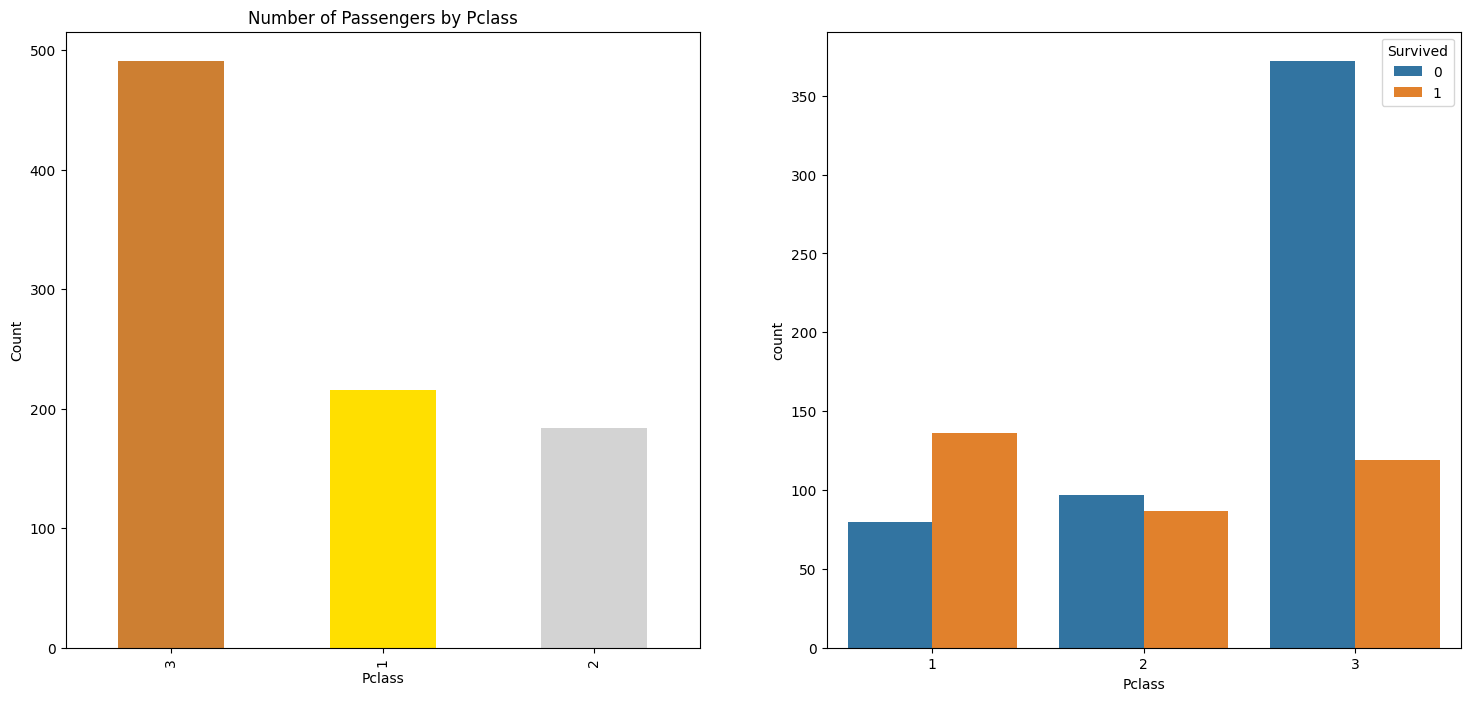

In [108]:
#lets plot the findings
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')   
ax[0].set_ylabel('Count')
sns.countplot(x= 'Pclass', ax=ax[1], data=train, hue='Survived')
#ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Even though a higher number of people in the 3rd class, many people survived from the first class.

The first class represents people who are wealthy, spending a luxury life. They may have that survival chance, due to a number of factors, such as better access to lifeboats, warmer cabins located higher up in the ship, and potentially even preferential treatment by the crew.

So, we can conclude that insights as money is matters to be survived in the titanic ship.


**Age**

Since the passenger's Age column has null values, we have to get rid from that gap first.
If we're filling that nulls according to their gender by applying mean value of the column, it's not fair at all. Becuase there are some babies as well as older persons. 

if we want to break down their ages precisly, we have to identify the age groups specifically.

In [109]:
print(train['Age'].isnull().sum())
print('Average Age:   ', train['Age'].mean())
print('Eldest person: ', train['Age'].max())
print('Youngest person: ', train['Age'].min())

177
Average Age:    29.69911764705882
Eldest person:  80.0
Youngest person:  0.42


In order to replace the Null values, we can assign the mean value of the Age column.
let's break down the passengers for groups accroding to their pronouns.

In [110]:
train['Initial'] = 0
for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initial

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Let's recorrect mispelled values with the correct salutions

In [111]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                        inplace=True)

#Average age by salutations
train.groupby('Initial')['Age'].mean()

# Fill Nulls
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr'), 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Initial == 'Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Initial == 'Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Initial == 'Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Initial == 'Other'), 'Age'] = 46


C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\1666065125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],


In [112]:
#check nulls
train.Age.isnull().sum()

0

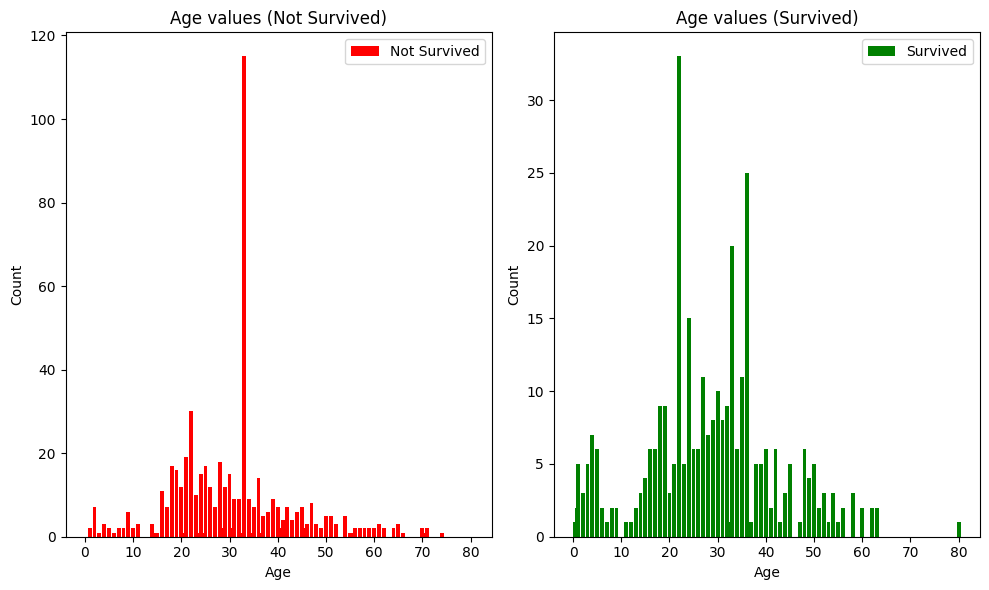

In [113]:
#plot the ages of the passengers and the survival 
# Group data by Age and survival
#stack the columns by gender
grouped_data = train.groupby(["Age", "Survived"]).size().unstack().fillna(0)

# Create bar plots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot Parch values for survived = 0
axs[0].bar(grouped_data.index, grouped_data[0], color='red', label='Not Survived')
axs[0].set_title("Age values (Not Survived)")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Count")
axs[0].legend()

# Plot Parch values for survived = 1
axs[1].bar(grouped_data.index, grouped_data[1], color='green', label='Survived')
axs[1].set_title("Age values (Survived)")
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Count")
axs[1].legend()

plt.tight_layout()
plt.show()




According to these charts we can see that, **children and older ones has a higher chance to be survived rather than middle ages**. If can see closely, ages between 30 and 40 range, more than 100 people has died. but when you again look at the survived chart, that limt doesn't even exceeds at least 30.


**Embarked column** - The port they get in

In [114]:
#check the mode 
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

Since the mode value of this column is **S**, we will fill the null values with the mode observation.                                  
C = Cherbourg, Q = Queenstown, S = Southampton

In [115]:
train['Embarked'].fillna('S', inplace=True)
train.Embarked.isnull().any()

C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\1486865619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)


False

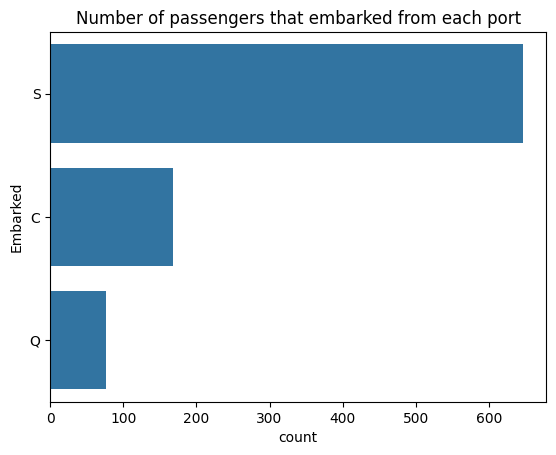

In [116]:
#plot the number of passengers that embarked from each port
sns.countplot(train['Embarked'])
plt.title('Number of passengers that embarked from each port')
plt.show()

**SibSip** - Whether the person alone or with his family members

Sibling - brother, sister, stepbrother                                                                                           
Spouse = Husband, Wife

In [117]:
pd.crosstab([train.SibSp], train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


This chart shows that, a personn have a higher the number of siblings, he has less chance to be survive.

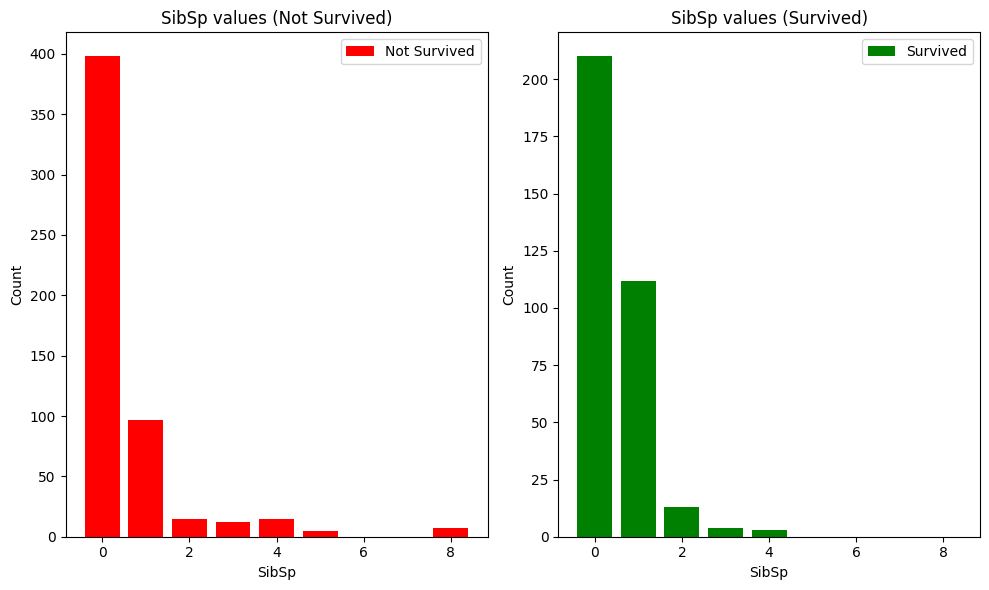

In [118]:
# Group data by Parch and survival
grouped_data = train.groupby(["SibSp", "Survived"]).size().unstack().fillna(0)

# Create bar plots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot Parch values for survived = 0
axs[0].bar(grouped_data.index, grouped_data[0], color='red', label='Not Survived')
axs[0].set_title("SibSp values (Not Survived)")
axs[0].set_xlabel("SibSp")
axs[0].set_ylabel("Count")
axs[0].legend()

# Plot Parch values for survived = 1
axs[1].bar(grouped_data.index, grouped_data[1], color='green', label='Survived')
axs[1].set_title("SibSp values (Survived)")
axs[1].set_xlabel("SibSp")
axs[1].set_ylabel("Count")
axs[1].legend()

plt.tight_layout()
plt.show()


**Parch**

does a passenger has parents or childern the ship

In [119]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

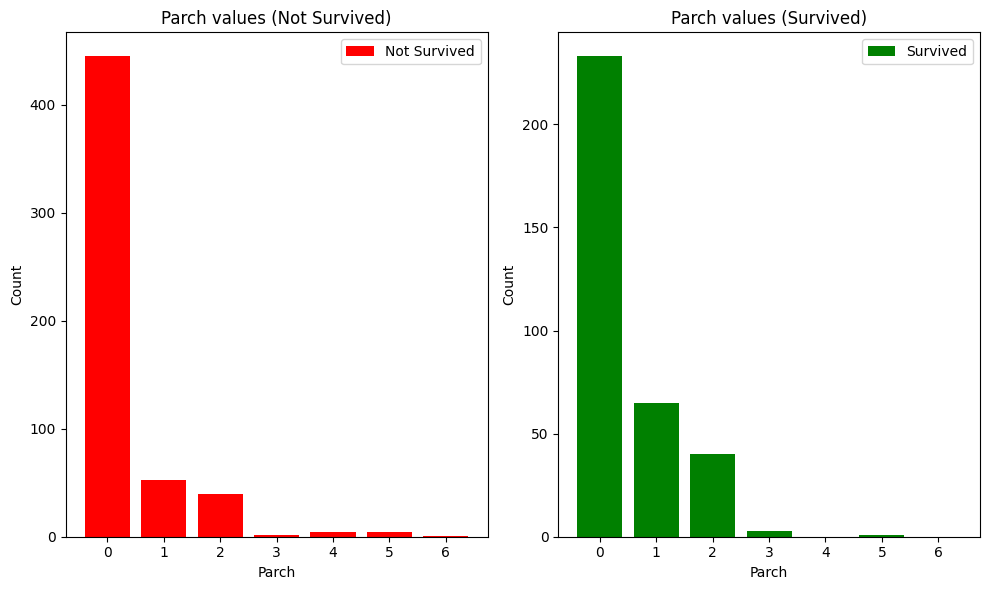

In [120]:
# Group data by Parch and survival
grouped_data = train.groupby(["Parch", "Survived"]).size().unstack().fillna(0)

# Create bar plots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot Parch values for survived = 0
axs[0].bar(grouped_data.index, grouped_data[0], color='red', label='Not Survived')
axs[0].set_title("Parch values (Not Survived)")
axs[0].set_xlabel("Parch")
axs[0].set_ylabel("Count")
axs[0].legend()

# Plot Parch values for survived = 1
axs[1].bar(grouped_data.index, grouped_data[1], color='green', label='Survived')
axs[1].set_title("Parch values (Survived)")
axs[1].set_xlabel("Parch")
axs[1].set_ylabel("Count")
axs[1].legend()

plt.tight_layout()
plt.show()


Same as the above chart, this chart shows the parents and childs in the ship. The higher the chance not to be survived if someone has higher number of parents and child with them.                                                                                                           If you can see that, number of parents and children on the ship like 4 or 5 has less chance to be survive.                                                                                                 

**Fare**

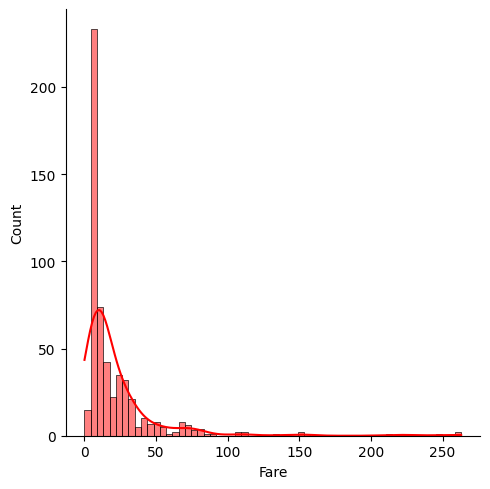

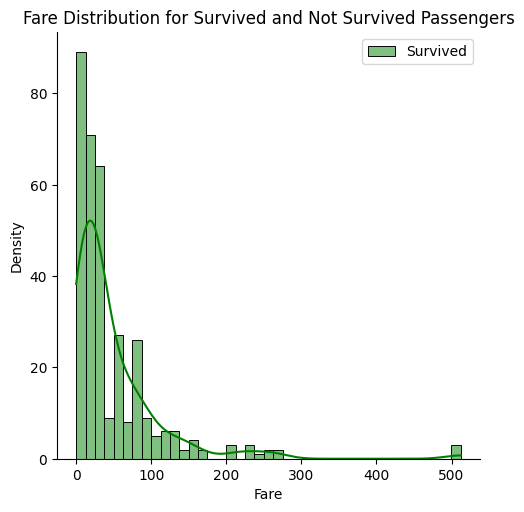

In [121]:
# Plot fare distribution for survived and not survived passengers
sns.displot(
    train[train["Survived"] == 0]["Fare"], label="Not Survived", kde=True, color="red"
)
sns.displot(
    train[train["Survived"] == 1]["Fare"], label="Survived", kde=True, color="green"
)

# Set title and labels
plt.title("Fare Distribution for Survived and Not Survived Passengers")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.show()

Survived:
- Highest Fare:  512.3292
- Mean Fare:     48.39540760233918
- Lowest Fare:   0.0
Not Survived:
- Highest Fare:  263.0
- Mean Fare:     22.117886885245902
- Lowest Fare:   0.0


C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\2457060535.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived'] == 1]['Fare'], label='Survived')
C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\2457060535.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train

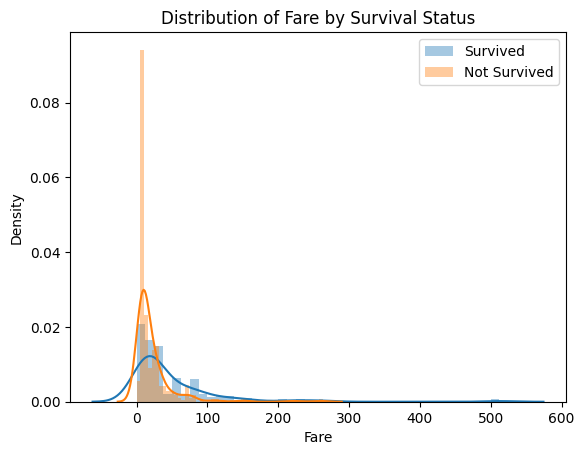

C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\2457060535.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[(train['Pclass'] == i) & (train['Survived'] == 1)]['Fare'], ax=ax[0, i - 1])
C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\2457060535.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



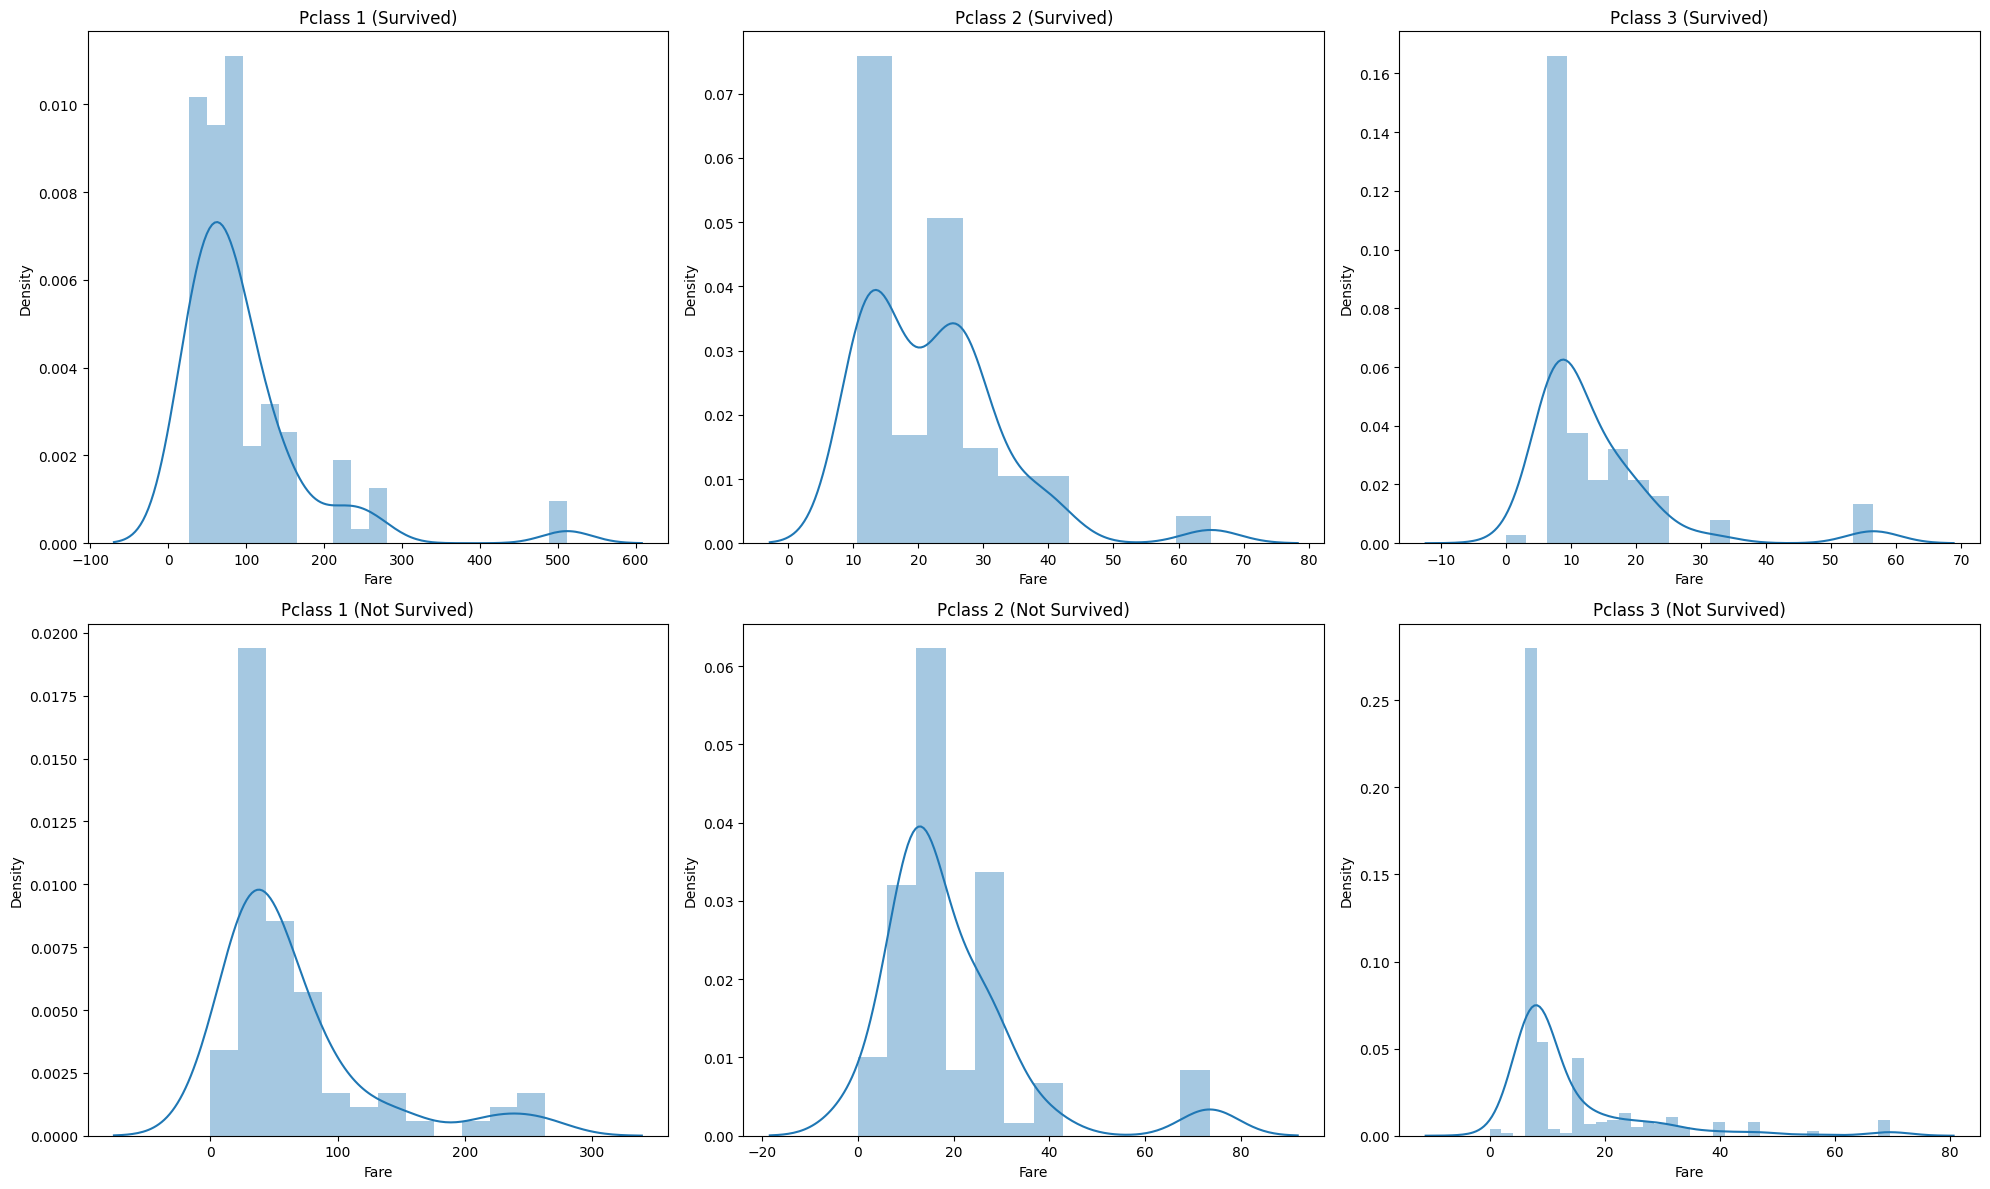

In [122]:
# Fare feature analysis based on survival

# Calculate descriptive statistics for Fare based on survival
print('Survived:')
print('- Highest Fare: ', train[train['Survived'] == 1]['Fare'].max())
print('- Mean Fare:    ', train[train['Survived'] == 1]['Fare'].mean())
print('- Lowest Fare:  ', train[train['Survived'] == 1]['Fare'].min())

print('Not Survived:')
print('- Highest Fare: ', train[train['Survived'] == 0]['Fare'].max())
print('- Mean Fare:    ', train[train['Survived'] == 0]['Fare'].mean())
print('- Lowest Fare:  ', train[train['Survived'] == 0]['Fare'].min())

# Create combined distribution plot for Fare based on survival
sns.distplot(train[train['Survived'] == 1]['Fare'], label='Survived')
sns.distplot(train[train['Survived'] == 0]['Fare'], label='Not Survived')
plt.title('Distribution of Fare by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

# Create separate distribution plots for Fare within each Pclass based on survival
f, ax = plt.subplots(2, 3, figsize=(20, 12))

for i in range(1, 4):
    sns.distplot(train[(train['Pclass'] == i) & (train['Survived'] == 1)]['Fare'], ax=ax[0, i - 1])
    ax[0, i - 1].set_title(f'Pclass {i} (Survived)')
    sns.distplot(train[(train['Pclass'] == i) & (train['Survived'] == 0)]['Fare'], ax=ax[1, i - 1])
    ax[1, i - 1].set_title(f'Pclass {i} (Not Survived)')

plt.tight_layout()
plt.show()

**passenger who paid higher fair has a great chance to be survived**

This chart shows the passenger's fare and the density of passenger count by their social classes.                                                       The number of survived people in the first class are getting higher fare than those who were not survived. And it has a higher density as well.                                                            But, in the 2nd and 3rd classes, the difference between the fare of passengers taking slight changes.

## Feature Engineering

In [123]:
#plot heatmap
trainn = train.copy()

# convert sex column to numerical values
trainn['Gender'] = trainn['Sex'].replace({'male':1, 'female':0})

#drop non-numeric columns for now
trainn.drop(['Sex', 'Name', 'Ticket','Cabin','Embarked','Initial'], axis=1, inplace=True)

C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\409992304.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trainn['Gender'] = trainn['Sex'].replace({'male':1, 'female':0})


**Split the dataset**

In [124]:
#split the dataset

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # 80% train, 20% test
for train_indices, test_indices in split.split(train, train[["Survived", "Pclass", "Sex"]]):
    strat_train_set = train.loc[train_indices]
    strat_test_set = train.loc[test_indices]

In [125]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(712, 13)
(179, 13)


# Data pre-processing

Incase if we have any null or missing data, let's fill them out using imputer method before we move forward.

In [126]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

**Convert categorical to numeric**

In [127]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        
        return X

Converted the above 2 columns to numerical. Because those 2 are most relevant categorical columns.

**Remove Unnccesory columns**

In [128]:
class FertureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket","Cabin", "Sex","Initial", "N"]
                    , axis=1, errors='ignore')

**Apply all the pre-proccesing to the pipeline**

In [129]:
#import pipelines
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("AgeImputer", AgeImputer()), 
                    ("FeatureEncoder", FeatureEncoder()), 
                    ("FeatureDropper", FertureDropper())])

**Apply the pipline to Trainset**

In [130]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [131]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


There is no null values now

In [132]:
strat_train_set.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
867,868,0,1,31.0,0,0,50.4958,0.0,0.0,1.0,0.0,1.0
619,620,0,2,26.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
50,51,0,3,7.0,4,1,39.6875,0.0,0.0,1.0,0.0,1.0


**Check Correlation**

<Axes: >

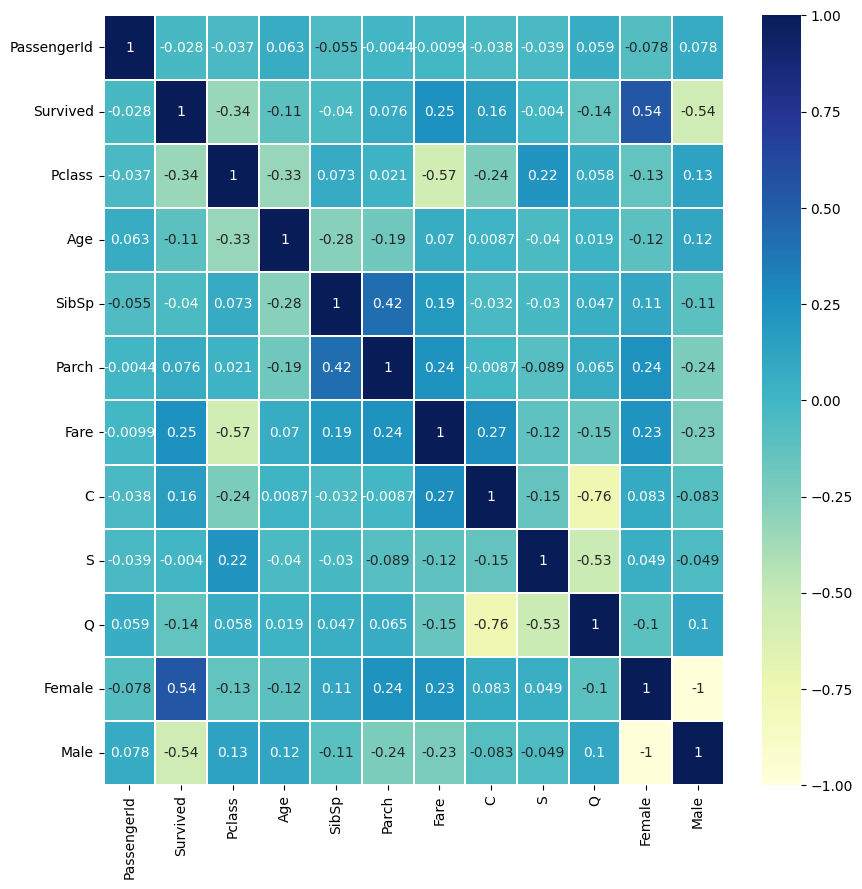

In [133]:
#plot the heatmap with custom figure size
plt.figure(figsize=(10, 10))

sns.heatmap(strat_train_set.corr(), annot=True, cmap='YlGnBu', linewidths=0.1)

**Normalize values**

In [134]:
#scale the numerical columns
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


# Model building

**Define the model**

In [135]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV   #used to cross validation

#define the classifier
clf = RandomForestClassifier()

#set the parameters
param_grid = [
    {"n_estimators": [10, 100, 200, 500], 'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 3, 4]}
]

#grid search
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

Used Grid search CV to find the bets hyperparameters of the model

In [136]:
#find the best estimator

final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

# Apply the pipeline to test set

In [137]:
#run the pipeline on the test set

strat_test_set = pipeline.fit_transform(strat_test_set)

In [138]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
659,660,0,1,58.00,0,2,113.2750,1.0,0.0,0.0,0.0,1.0
119,120,0,3,2.00,4,2,31.2750,0.0,0.0,1.0,1.0,0.0
875,876,1,3,15.00,0,0,7.2250,1.0,0.0,0.0,1.0,0.0
67,68,0,3,19.00,0,0,8.1583,0.0,0.0,1.0,0.0,1.0
644,645,1,3,0.75,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1,3,33.00,3,0,15.8500,0.0,0.0,1.0,1.0,0.0
687,688,0,3,19.00,0,0,10.1708,0.0,0.0,1.0,0.0,1.0
538,539,0,3,33.00,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
279,280,1,3,35.00,1,1,20.2500,0.0,0.0,1.0,1.0,0.0


In [139]:
#scale the numerical columns
X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [140]:
final_clf.score(X_data_test, y_data_test)

0.8156424581005587

**Model training begins**

In [141]:
final_data = pipeline.fit_transform(train)

In [142]:
final_data.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0


In [143]:
#scale the numerical columns
X_final = final_data.drop(["Survived"], axis=1)
y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

for this task, we used Random Forest classifier model from sk learn

In [144]:
#Random Forest model
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], 'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

We used Grid Search Cv method to find the best parameters for this model's best performance

In [145]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=10)

# TEst the model

In [146]:

#test the model
prod_final_clf.score(X_data_final, y_data_final)
#print("Accuracy:", prod_final_clf.score(X_data_final, y_data_final))

0.8585858585858586

import test set

In [147]:
titanic_test = pd.read_csv('test.csv')

In [148]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


As you can see here, we have unnccesary columns like Name, Ticket and Cabin in our testset. So, we'll clean and remove the dataset to a standard format that can apply to the  machine learning algorithms.

In [149]:
final_test_data = pipeline.fit_transform(titanic_test)

In [150]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


Now, the dataset is in the standard format. Then we'll normalize the dataset to get a better performance.

**Normalize** the dataset as previous

In [151]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

C:\Users\dkout\AppData\Local\Temp\ipykernel_13504\2762343627.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method='ffill')


Making predictions  with machine learning models

In [152]:
predictions = prod_final_clf.predict(X_data_final_test)

Export the results column and the passenger ID to a seperate  CSV file

In [153]:
final_df = pd.DataFrame(titanic_test['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('titanic_predictions.csv', index=False)


In [154]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


I've upload this predicted column to the kaggle Titanic challenge. My score is: 0.79425.                                                                                            
Here's the link to the leaderboard: https://www.kaggle.com/competitions/titanic/leaderboard#